In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.4.1
1.13.3
2.0.2


In [6]:
import random

input_2d_x_1 = np.array([[random.randint(1, 1000) for i in range(2)] for j in range(100)], dtype=np.float32)
input_2d_x_2 = np.array([[random.randint(700, 2000) for i in range(2)] for j in range(100)], dtype=np.float32)
input_2d_x_3 = np.array([[random.randint(1700, 3000) for i in range(2)] for j in range(100)], dtype=np.float32)

input_2d_x = np.append(np.append(input_2d_x_1, input_2d_x_2, axis=0), input_2d_x_3, axis=0)


In [7]:
input_2d_x

array([[   78.,   889.],
       [  720.,   991.],
       [  846.,   255.],
       [  853.,   149.],
       [  939.,   415.],
       [  872.,   233.],
       [  779.,   896.],
       [  577.,   174.],
       [  732.,   729.],
       [  527.,   225.],
       [  131.,   241.],
       [  810.,   116.],
       [  737.,   691.],
       [  462.,   877.],
       [  246.,   960.],
       [  160.,   661.],
       [  184.,   549.],
       [  290.,   349.],
       [  705.,   345.],
       [  336.,   660.],
       [  429.,   906.],
       [  982.,   966.],
       [  852.,   775.],
       [  358.,   313.],
       [  350.,   867.],
       [  610.,     4.],
       [   21.,   151.],
       [  275.,   128.],
       [  401.,   840.],
       [  618.,   240.],
       [  768.,   466.],
       [  521.,   170.],
       [  985.,   314.],
       [   28.,   910.],
       [  723.,   535.],
       [  811.,   615.],
       [  980.,    10.],
       [  774.,   379.],
       [  734.,   236.],
       [  431.,   135.],


In [8]:
def input_fn_2d(input_2d):
    input_t = tf.convert_to_tensor(input_2d, dtype=tf.float32)
    
    return (input_t, None)

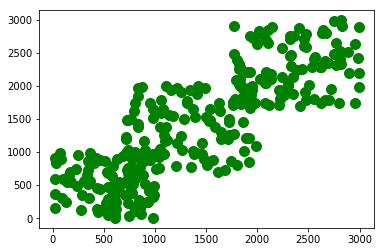

In [9]:
plt.scatter(input_2d_x[:,0], input_2d_x[:,1], s=100, color="green")
plt.show()

In [10]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans

from tensorflow.contrib.factorization.python.ops import clustering_ops

In [11]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x116768190>, '_model_dir': '/var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpgfoWyl', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}


In [12]:
fit = k_means_estimator.fit(input_fn=lambda: input_fn_2d(input_2d_x), steps=1000)

Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpgfoWyl/model.ckpt.
INFO:tensorflow:loss = 2.41401e+08, step = 1
INFO:tensorflow:global_step/sec: 1248.38
INFO:tensorflow:loss = 6.93713e+07, step = 101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1394.19
INFO:tensorflow:loss = 6.91e+07, step = 201 (0.071 sec)
INFO:tensorflow:global_step/sec: 1306.45
INFO:tensorflow:loss = 6.90338e+07, step = 301 (0.078 sec)
INFO:tensorflow:global_step/sec: 1313.96
INFO:tensorflow:loss = 6.89941e+07, step = 401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1248.86
INFO:tensorflow:loss = 6.89757e+07, step = 501 (0.080 sec)
INFO:tensorflow:global_step/sec: 1319.28
INFO:tensorflow:loss = 6.89657e+07, step = 601 (0.076 sec)
INFO:tensorflow:global_step/sec: 1312.45
INFO:tensorflow:loss = 6.89598e+07, step = 701 (0.076 sec)
INFO:tensorflow:global_step/

In [13]:
clusters_2d = k_means_estimator.clusters()
clusters_2d

array([[ 2322.67016602,  2278.35668945],
       [ 1346.2244873 ,  1405.44970703],
       [  587.76794434,   513.92419434]], dtype=float32)

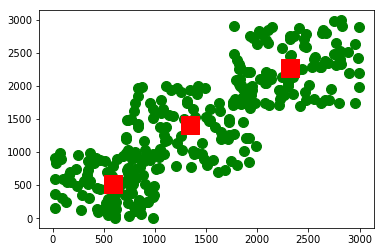

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_2d_x[:,0], input_2d_x[:,1], s=100, marker='o', color="green")
ax1.scatter(clusters_2d[:,0], clusters_2d[:,1], c='r', s=300, marker='s')

plt.show()

In [15]:
k_means_estimator.get_params()

{'params': {'distance_metric': 'squared_euclidean',
  'kmeans_plus_plus_num_retries': 2,
  'mini_batch_steps_per_iteration': 1,
  'num_clusters': 3,
  'random_seed': 0,
  'relative_tolerance': None,
  'training_initial_clusters': 'random',
  'use_mini_batch': True}}

In [16]:
ex_2d_x = np.array([[1700, 1700]], dtype=np.float32)

In [17]:
predict = k_means_estimator.predict(input_fn=lambda: input_fn_2d(ex_2d_x), as_iterable=False)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpgfoWyl/model.ckpt-1000


In [18]:
predict

{'all_scores': array([[  722215.  ,   211917.25,  2643836.  ]], dtype=float32),
 'cluster_idx': 1}